## Decision Trees

Decision trees
- versatile machine learning algorithm that can perform both classification and regression task and event multi output tasks
- they are powerful algorithm capable of fittting complex datsset
- decision tree are also the fundamental component of random forest which are among the most powerful machine learning algorithm available today

### Training and Visualizing a Decision Tree

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target 

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [6]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


In [7]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [14]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, 
                out_file=("iris_tree.dot"),
                feature_names=["petal length (cm)", "petal width (cm)"],
                class_names=iris.target_names,
                rounded=True, 
                filled=True)

### Making predictions

suppose we wanrt find an iris flower and we wanr to classify it based on its petal 
- we start at the root node : this node asks wheter the flower petal length is smaller than 2.45 cm 
- if it is then we move down to the roort left child nodel in this case is a leaf node so is does not ask any question 
- simply look at the predicted class for that node and deciison tree predict that your flower is an iris setosa 
- now suppose we find another flower and this time the patal length is greather than 2.45 cm 
- we again strat at the root but now we move down to its right child node 
- this is not a leaf node it is a aplit node so it ask another questio is the petl width smaller than 1.75 cm 
- if tis is then your flowe is most likely an iris versicolor 
- if not it is like an iris virginica 
- its really that simple 

a node "samples" attribute count how many training instance s is applies to 
- for example 100 training instance have a petal length greather tahn 2.45 cm and of those 100, 
- 54 have a petal width smaller than 1.75cm 
- a node value attribute tells we how many training instance of each class this node applies to:

for example
- the bottom right node applies to 0 iris setosa 
- 1 iris versicolor
- 45 iris virginica 
- finnaly gini attrbute measures its gini impurity: a node is "pure" (gini=0) if all training instance it applies to belong to the same class 
- for example since the depth 1 left node applies only to iris setosa training instance it is pure and its gini impurity is 0 

note 
- scikit learn use the cart algorithm wich produce only binary trees, meaning trees where aplit nodes always have exatly two children 
- however other algorithms such as ID3 can produce decision tree with nodes that have more than 2 children

White Box Versus Balck Box 
- decision tree are intuitive and their decision are asyl to interpret
- such modela re often called white box models 
- random forest and neural network are generally considered vblack box models 
- they make great predictoion and we can easily check the calculation that they perform to make these predictions 
- nevertheless it is usually hard to explain in simple terms why the prediction were made 

### Estimating class probabilities

- decision tree can also estimate the probabilities that an instance belongs to a particular class "k"
- first it traverses the tree to find the leaf node for this instnce and then it return the ratio of training instances of class k in this node 
- example suppose we found a flower whose petal are 5 cm long an 1.5 cm wide 
- the corresonding leaf node is the depth 2 left node so decision tree outputs the following probabilities 
- 0% for iris setosa (0/54)
- 90,70% for iris versicolor (49/54)
- 9.3% for iris verginica (5/54)
- ad if we ask it to predict the class it outputs iris versicolor because it has the highest probability

In [17]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [18]:
tree_clf.predict([[5, 1.5]])

array([1])

### The CART training algorithm

- the algorithm works by first splitting the traiining set into two subset using a single features k and a thresholf tk
- how does it choose k and tk 
- it search for the pair (k, tk) that produces the purest subset weighted b their size 


- once the cart algorithm has successfully split the training set in two it split the subset using the same logic then the sub subset and so on recursively.
- it stop recursing once it reach the maximum depth define by max_depth hyperparameter, or if it cannot find a split that will reduce impurity 


### Computational Complexity

- O(log2(m))
- log2m is the binary algorithm of m equal to log(m)/log(2)
- since each node only requires checking the value of one feature the overall prediction complexity is O(log2(m)), independent of the number of features 
- so prediction are very fast even when dealing with large training set 

### Ginin Impurity or Entropy?

- by default decision tree classifier class use the gini impurity measure but we can select the entropy impurity measure instead by setting the criterion hyperparameter to "entropy"
- the consept of entropyoriginated in thermodynamics a a measure of molecular disorder 
- entropy approach zero when moleculer are still ans well ordered 
- entropy later spred to a wide variety of domain including in shannon information theory where it measure the average information content of a message. 
- enropy is zero when all message are identical 
- in machine learning entropy is frequently used as an impurity measure sa sets entropy is zero when it contains instance of only one class  

so shoule we use Gini impurity or Entropy?
- the trut is 
- most of time it does not make a big difference 
- they lead to similar trees 
- gini impurity slicghly faster to compute so it is a good default 
- gini impurity tends to isolate the most frequent class in its own branch of the tree 
- while entropy tends to produce slighly more balanced tree

### Regularization hyperparameters

Decision tree make very few assumption about the training data 
- (as opposed to linear models which asumer that the data is lonear for exampple)
- if left unconstrained , the tree structure will adapt itself to the training data, fitting it very cloely -- indeed, most likely overfitting it.
- such a model is often called a non parameteric model not because it does not have any parameters but because the number of parameter is not determined prior to training, so the model structure is free to stick closely to the data
- in contrat a parametric model such as a linear model has predertermined number of parameter so its degree of freedom is limited, reducing the tisk overfitting( but increasin the risk of underfitting)

- to avoid overfitting the training data we neeed to restrict the decision tree freedom during training 
- this called regularization 
- the regularization hyperparameter depend on the algprithm uset 
- but generaly we can at least restrict the maximum depth of the decision tree 
- in scikit learn this is controled by the max depth hyperparameter the default is none which measn unlimited 
- reducing mas depth will regularize the model and thus reduce the risk overfitting 

The decision tre classifier class has a few other parameter that similarly restrict the shape of the decision tree
- max_features
- max_leaf_nodes
- min_samples_split
- min_samples_leaf
- min_weight_fraction_leaf
- increasin min_* hyperparmeter or reducing max_* hyperparameter will regularize the model 

- other algorithm work by first training the decision tree without restriction then pruning deleting unnecessary nodes
- a node whose children are all leaf nodes is considered unnecessart if the purity improvement it provides is not statisticaly significant 
- standard statistical test such as chi squared test are used to estimate the probability that the improvement is purely the result of change 
- if this probability called p value is higher thana given treshodld typically 5% controled by hyperparameter then the node is considered unnecessary ans its childrean re deletd 
- the pruning contonuous until all unnecessary nodes have been pruned 

In [19]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

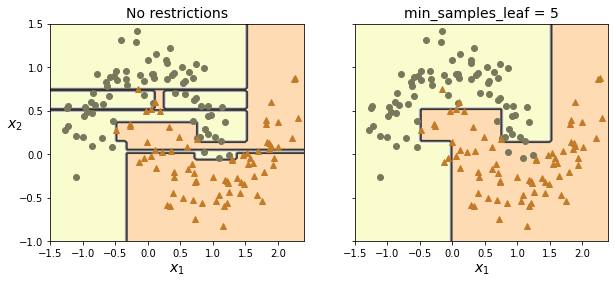

In [21]:
import numpy as np 

def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
plt.show()

- left unregularized model is clearly overfitting 
- and the regularized model on the right probability generalize better 
- we can verify this by evaluating both trees on a test set generated using a different random seed

In [22]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=43)
tree_clf1.score(X_moons_test, y_moons_test)

0.898

In [23]:
tree_clf2.score(X_moons_test, y_moons_test)

0.92

### Regression

In [24]:
import numpy as np 
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad ** 2 + 0.025 * np.random.rand(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

- the main difference is that instead of predictig a class in each node it predict a values 
- this prediction is the average target value of the 110 training instancve associated with the laef node and it result in a mean squared error equal to 0.015 over these 110 instance 

- The cart algorithm works as described earlier except of trying to split the training set in a way that minimazes impurity it now tries to split the traininv set in a way the minimize the mse 
- just like for classification task, decision tree are prine to iverfitting when dealing with regression tasj 
- without any regularization we get the prediction on the left in figure 
- these predictuon are obviously overfitting the training set very badly 
- just setting min smaple leaf =10 result in a much more reasonable model represented on the rig figure

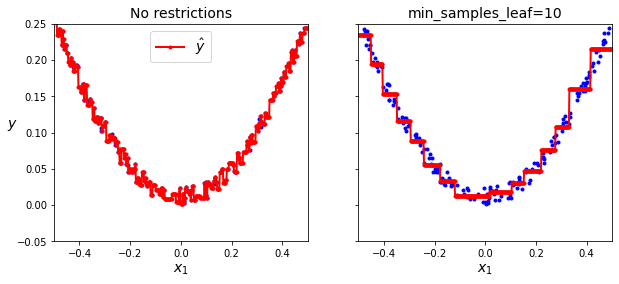

In [28]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X_quad, y_quad)
tree_reg2.fit(X_quad, y_quad)

x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center")
plt.title("No restrictions")

plt.sca(axes[1])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}")

plt.show()


### Sensitivyty to Axis Orientation

- however decision tree have a few limitatton 
- first decisio tree love orthogonal deciison boudaries which make them sensitive to the data orientatuon 


- lets creare a small pipeline that scale the data and rotate it using pca then train a decision tree classifier on the data 

In [29]:
from sklearn.decomposition import PCA 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

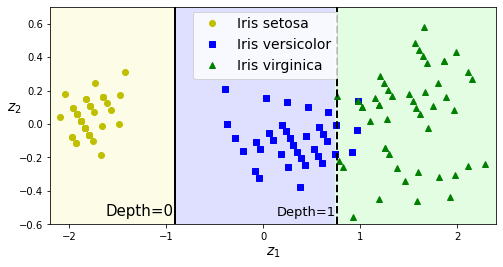

In [31]:
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

plt.figure(figsize=(8, 4))

axes = [-2.2, 2.4, -0.6, 0.7]
z0s, z1s = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                       np.linspace(axes[2], axes[3], 100))
X_iris_pca_all = np.c_[z0s.ravel(), z1s.ravel()]
y_pred = tree_clf_pca.predict(X_iris_pca_all).reshape(z0s.shape)

plt.contourf(z0s, z1s, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris_rotated[:, 0][y_iris == idx],
             X_iris_rotated[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
th1, th2 = tree_clf_pca.tree_.threshold[[0, 2]]
plt.plot([th1, th1], axes[2:], "k-", linewidth=2)
plt.plot([th2, th2], axes[2:], "k--", linewidth=2)
plt.text(th1 - 0.01, axes[2] + 0.05, "Depth=0",
         horizontalalignment="right", fontsize=15)
plt.text(th2 - 0.01, axes[2] + 0.05, "Depth=1",
         horizontalalignment="right", fontsize=13)
plt.axis(axes)
plt.legend(loc=(0.32, 0.67))

plt.show()


### Decision tree have a high variance 

- the main issue with decisio tree is that they have a high variance 
- small change to the hyperparamet or to the data produce very difference model 
- in fact since the training lgoruthm used by scikit learn is stochastoc - it randomly select the set of features to evalueta at each node even retraining the same decistion tree on the exact same data may produce a cery different model 

In [32]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_iris, y_iris)


DecisionTreeClassifier(max_depth=2, random_state=40)

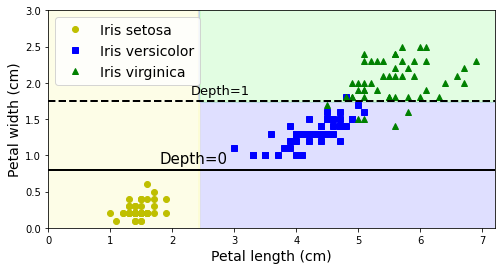

In [34]:
plt.figure(figsize=(8, 4))
lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")


th0, th1 = tree_clf_tweaked.tree_.threshold[[0, 2]]
plt.plot([0, 7.2], [th0, th0], "k-", linewidth=2)
plt.plot([0, 7.2], [th1, th1], "k--", linewidth=2)
plt.text(1.8, th0 + 0.05, "Depth=0", verticalalignment="bottom", fontsize=15)
plt.text(2.3, th1 + 0.05, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.axis([0, 7.2, 0, 3])
plt.legend()
plt.show()


- luckily by averaging prediction over many tress 
- it possible to reduce variance significantly such as ensemble of tree is called a random forest 
- and it is one of most powerfull typeof model availabele today